In [26]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,3)

In [27]:
def cut(low,high,feature,signal,bkgd):
    bkgdDataCut =bkgd[ bkgd[feature]>low]
    bkgdDataCut=bkgdDataCut[bkgdDataCut[feature]<high]
    
    signalDatacut=signal[signal[feature]>low]
    signalDatacut=signalDatacut[signalDatacut[feature]<high]
    
    bkgdMean = 2000 * len(bkgdDataCut[feature])/len(qcdData[feature])
    
    signalMean = 50 * len(signalDatacut[feature])/len(higgsData[feature])
    
    p = (1-scipy.stats.poisson.cdf(bkgdMean+signalMean, bkgdMean))
    print('We get a simga significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),low,high))
    print('number of higgs signla left {0:1.1f}'.format(signalMean))
    print('number of background signla left {0:1.1f}'.format(bkgdMean))
    #print(signalMean)
    
    return(signalDatacut,bkgdDataCut)

def cut1(low,high,feature,signal):
    #bkgdDataCut =bkgd[ bkgd[feature]>low]
    #bkgdDataCut=bkgdDataCut[bkgdDataCut[feature]<high]
    
    signalDatacut=signal[signal[feature]>low]
    signalDatacut=signalDatacut[signalDatacut[feature]<high]
    
    #bkgdMean = 2000 * len(bkgdDataCut[feature])/len(qcdData[feature])
    
    #signalMean = 50 * len(signalDatacut[feature])/len(higgsData[feature])
    
    #p = (1-scipy.stats.poisson.cdf(bkgdMean+signalMean, bkgdMean))
    #print('We get a simga significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),low,high))
    #print('number of higgs signla left {0:1.1f}'.format(signalMean))
    #print('number of background signla left {0:1.1f}'.format(bkgdMean))
    #print(signalMean)
    
    return(signalDatacut)

In [28]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)


higgsDataMod = pd.DataFrame(new_dict)
higgsData = pd.DataFrame(new_dict)
# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [29]:

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)

qcdDataMod = pd.DataFrame(new_dict)
qcdData = pd.DataFrame(new_dict)

# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [30]:
highLum=pd.read_hdf('data_highLumi_pt_1000_1200.h5')
lowLum=pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

In [31]:
lowLum.shape

(442, 14)

In [32]:
highLum.shape

(4066, 14)

In [33]:
highLum

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1014.701381,0.320861,1.662700,237.429321,0.119700,0.002641,1.539811,0.008410,1.020637,0.284296,0.259425,0.278548,0.912517,0.356557
1,1040.093465,-0.402904,0.657100,137.024953,0.028117,0.000290,13.035447,0.007623,0.924653,0.883464,0.682923,0.955454,0.773007,0.032092
2,1023.915889,-0.157793,1.352514,161.716106,0.046337,0.000674,6.771647,0.009618,0.938172,0.743193,0.663864,0.792171,0.893260,0.178641
3,1079.532839,-1.356773,-0.683310,85.629307,0.011316,0.000039,27.146507,0.000455,1.033940,0.927058,0.855880,0.896626,0.923222,0.010303
4,1167.522933,0.032726,-1.440446,345.520406,0.156304,0.006467,1.693575,0.011564,0.940346,0.555762,0.382950,0.591018,0.689055,0.349341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1090.490389,-0.383384,0.580866,315.865016,0.148747,0.004730,1.437327,0.008757,0.899599,0.220003,0.165191,0.244556,0.750857,0.463219
4062,1024.261156,0.782132,-1.597681,114.142976,0.020067,0.000148,18.339293,0.003206,0.914173,0.848558,0.782821,0.928225,0.922531,0.015276
4063,1018.257604,0.658496,0.893016,55.924149,0.017371,0.000030,5.665910,0.001219,0.752979,0.345601,0.312060,0.458978,0.902950,0.092592
4064,1198.680592,0.307368,-1.514498,107.594697,0.015019,0.000039,11.637634,0.003877,0.605913,0.216714,0.203449,0.357665,0.938791,0.652686


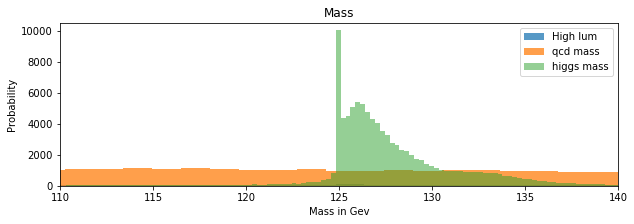

In [34]:
plt.hist(highLum['mass'], bins=500, density= False,label ='High lum',alpha=0.75)
plt.hist(qcdData['mass'], bins=500, density= False,label ='qcd mass',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['mass'], bins=500, density= False,label ='higgs mass',alpha=0.5)
plt.show
plt.title('Mass')
plt.ylabel('Probability')
plt.xlabel('Mass in Gev')
plt.xlim([110,140])
plt.legend()

<function matplotlib.pyplot.show(*args, **kw)>

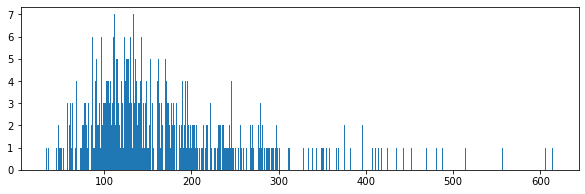

In [35]:
plt.hist(lowLum['mass'], bins=500, density= False,label ='Low lum',alpha=1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

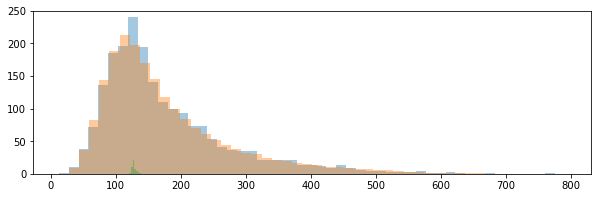

In [37]:

histHighLum , binsEdg=np.histogram(np.array(highLum['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])

histQcd , binsEdg=np.histogram(np.array(qcdData['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1],50*histHiggs/len(higgsData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40)


#plt.hist(2000*histQcd/len(qcdData['mass']), bins=50, density= False,label ='qcd mass',alpha=0.75)

#hist , binsEdg=np.histogram(np.array(qcdData['mass']), bins=50, density= False)
#plt.hist(50*higgsData['mass']/len(higgsData['mass']), bins=500, density= False,label ='higgs mass',alpha=0.5)

plt.ylim([0,250])

plt.show

In [38]:
#histHiggs , binsEdg=np.histogram(np.array(higgsData['mass']), bins=50, density= False)
#plt.bar(binsEdg[:-1],2000 *histHiggs/len(higgsData['mass'], width=np.diff(binsEdg), align="edge",alpha=0.75)


#plt.hist(2000*histQcd/len(qcdData['mass']), bins=50, density= False,label ='qcd mass',alpha=0.75)

#hist , binsEdg=np.histogram(np.array(qcdData['mass']), bins=50, density= False)
#plt.hist(50*higgsData['mass']/len(higgsData['mass']), bins=500, density= False,label ='higgs mass',alpha=0.5)



#plt.show




#plt.hist(x[0],bins=50, density= False,label ='qcd mass',alpha=0.75)

In [39]:
len(np.array(qcdData['mass']))

100000

In [40]:
len(qcdData['mass'])

100000

No handles with labels found to put in legend.


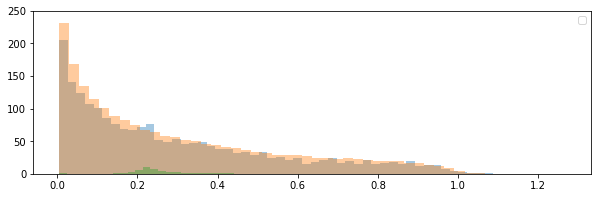

In [41]:
histHighLum , binsEdg=np.histogram(np.array(highLum['KtDeltaR']), bins=50, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['KtDeltaR']), width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])

histQcd , binsEdg=np.histogram(np.array(qcdData['KtDeltaR']), bins=50, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['KtDeltaR']), width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['KtDeltaR']), bins=50, density= False)
plt.bar(binsEdg[:-1],50 *histHiggs/len(higgsData['KtDeltaR']), width=np.diff(binsEdg), align="edge",alpha=0.40)

plt.legend()

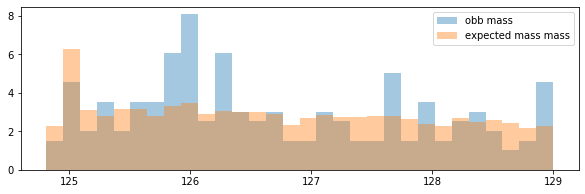

In [42]:
highLumMassCut=cut1(124.8,129,'mass',highLum)
histHighLum , binsEdg=np.histogram(np.array(highLumMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataMassCut=cut1(124.8,129,'mass',qcdData)
histQcd , binsEdg1=np.histogram(np.array(qcdDataMassCut['mass']), bins=30, density= False)
#plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataMassCut=cut1(124.8,129,'mass',higgsData)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass']))+(2000 *histQcd/len(qcdData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='expected mass mass')

plt.legend()


<BarContainer object of 30 artists>

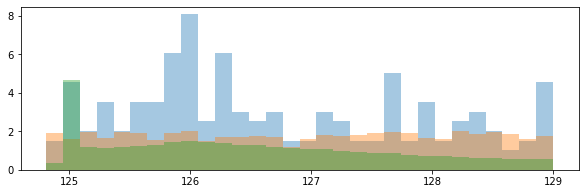

In [43]:
highLumMassCut=cut1(124.8,129,'mass',highLum)
histHighLum , binsEdg=np.histogram(np.array(highLumMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataMassCut=cut1(124.8,129,'mass',qcdData)
histQcd , binsEdg1=np.histogram(np.array(qcdDataMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataMassCut=cut1(124.8,129,'mass',higgsData)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='higgs mass')



In [44]:
histQcd

array([ 95,  80,  97,  83,  99,  95,  77,  95, 101,  74,  84,  85,  87,
        86,  60,  80,  90,  89,  90,  95,  97,  96,  82,  80, 102,  94,
        99,  92,  80,  88])

In [45]:
histQcd+histHiggs

array([ 799, 9429, 2439, 2354, 2421, 2616, 2627, 2962, 3051, 2949, 2846,
       2692, 2614, 2489, 2295, 2274, 2234, 2007, 1925, 1857, 1815, 1582,
       1554, 1474, 1421, 1294, 1335, 1258, 1176, 1169])

In [46]:
binsEdg1

array([124.80564268, 124.94536803, 125.08509338, 125.22481873,
       125.36454408, 125.50426943, 125.64399478, 125.78372013,
       125.92344548, 126.06317083, 126.20289619, 126.34262154,
       126.48234689, 126.62207224, 126.76179759, 126.90152294,
       127.04124829, 127.18097364, 127.32069899, 127.46042434,
       127.60014969, 127.73987504, 127.87960039, 128.01932574,
       128.15905109, 128.29877644, 128.4385018 , 128.57822715,
       128.7179525 , 128.85767785, 128.9974032 ])

In [47]:
binsEdg2

array([124.80007558, 124.94006363, 125.08005168, 125.22003973,
       125.36002777, 125.50001582, 125.64000387, 125.77999192,
       125.91997996, 126.05996801, 126.19995606, 126.33994411,
       126.47993215, 126.6199202 , 126.75990825, 126.8998963 ,
       127.03988434, 127.17987239, 127.31986044, 127.45984849,
       127.59983653, 127.73982458, 127.87981263, 128.01980068,
       128.15978872, 128.29977677, 128.43976482, 128.57975287,
       128.71974091, 128.85972896, 128.99971701])

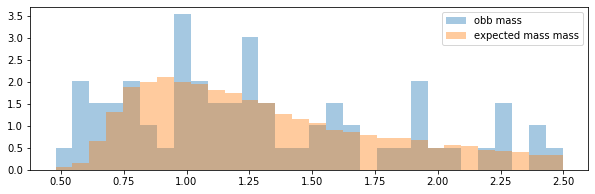

In [48]:
highLumCut2=cut1(0,2.5,'d2',highLumMassCut)
histHighLum , binsEdg=np.histogram(np.array(highLumCut2['d2']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut2=cut1(0,2.5,'d2',qcdDataMassCut)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut2['d2']), bins=30, density= False)
#plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataCut2=cut1(0,2.5,'d2',higgsDataMassCut)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut2['d2']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass']))+(2000 *histQcd/len(qcdData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='expected mass mass')

plt.legend()


#higgsCut2,bkgdCut2=cut(0,2.5,'d2',higgsDataCut,qcdDataCut)



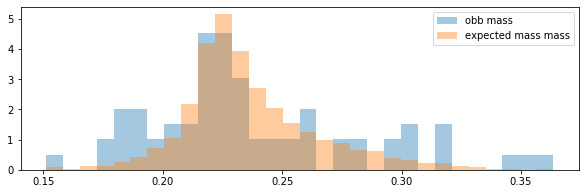

In [49]:
highLumCut3=cut1(0.1,0.7,'KtDeltaR',highLumCut2)
histHighLum , binsEdg=np.histogram(np.array(highLumCut3['KtDeltaR']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut3=cut1(0.1,0.7,'KtDeltaR',qcdDataCut2)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut3['KtDeltaR']), bins=30, density= False)
#plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataCut3=cut1(0.1,0.7,'KtDeltaR',higgsDataCut2)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut3['KtDeltaR']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass']))+(2000 *histQcd/len(qcdData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='expected mass mass')

plt.legend()

#x=cut(0.1,0.7,'KtDeltaR',higgsCut2,bkgdCut2)



In [50]:
bkgdMean = 2000 * len(qcdDataCut3)/len(qcdData)
    
signalMean = 2050 * len(highLumCut3)/len(highLum)
    
p = (1-scipy.stats.poisson.cdf(signalMean, bkgdMean))

print('We get a simga significance of {0:1.3f}'.format(stats.norm.ppf(1-p)))
print('number of higgs signla left {0:1.1f}'.format(signalMean))
print('number of background signla left {0:1.1f}'.format(bkgdMean))
 

We get a simga significance of inf
number of higgs signla left 34.3
number of background signla left 2.0


In [51]:
len(qcdDataCut3)

100

In [52]:
qcdDataCut3.shape

(100, 14)

In [53]:
bkgdMean = 4066 * len(qcdDataCut3)/len(qcdData)
    
signalMean = 4066 * len(highLumCut3)/len(highLum)
    
p = (1-scipy.stats.poisson.cdf(signalMean, bkgdMean))

print('We get a simga significance of {0:1.3f}'.format(stats.norm.ppf(1-p)))
print('number of higgs signla left {0:1.1f}'.format(signalMean))
print('number of background signla left {0:1.1f}'.format(bkgdMean))

We get a simga significance of inf
number of higgs signla left 68.0
number of background signla left 4.1


In [54]:
highLum.shape

(4066, 14)

*low lum*

<function matplotlib.pyplot.show(*args, **kw)>

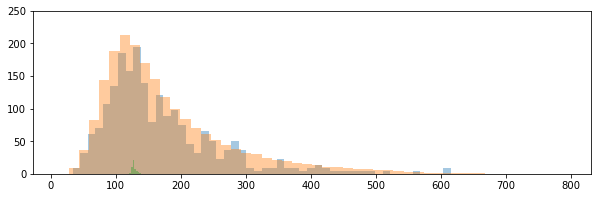

In [59]:
histLowLum , binsEdg=np.histogram(np.array(lowLum['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1], 2050*histLowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])

histQcd , binsEdg=np.histogram(np.array(qcdData['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1],50*histHiggs/len(higgsData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40)


#plt.hist(2000*histQcd/len(qcdData['mass']), bins=50, density= False,label ='qcd mass',alpha=0.75)

#hist , binsEdg=np.histogram(np.array(qcdData['mass']), bins=50, density= False)
#plt.hist(50*higgsData['mass']/len(higgsData['mass']), bins=500, density= False,label ='higgs mass',alpha=0.5)

plt.ylim([0,250])

plt.show

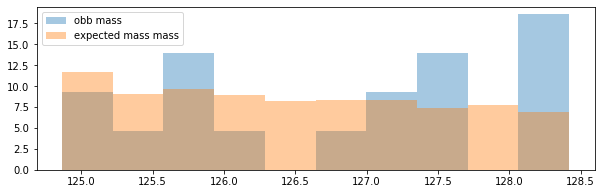

In [66]:
lowLumMassCut=cut1(124.8,129,'mass',lowLum)
histLowLum , binsEdg=np.histogram(np.array(lowLumMassCut['mass']), bins=10, density= False)
plt.bar(binsEdg[:-1], 2050*histLowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataMassCut=cut1(124.8,129,'mass',qcdData)
histQcd , binsEdg1=np.histogram(np.array(qcdDataMassCut['mass']), bins=10, density= False)
#plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataMassCut=cut1(124.8,129,'mass',higgsData)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataMassCut['mass']), bins=10, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass']))+(2000 *histQcd/len(qcdData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='expected mass mass')

plt.legend()

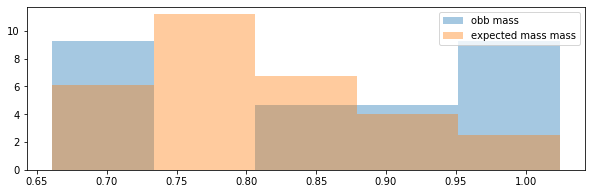

In [72]:
lowLumCut2=cut1(0,2.5,'d2',lowLumMassCut)
histlowLum , binsEdg=np.histogram(np.array(lowLumCut2['d2']), bins=5, density= False)
plt.bar(binsEdg[:-1], 2050*histlowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut2=cut1(0,2.5,'d2',qcdDataMassCut)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut2['d2']), bins=5, density= False)
#plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataCut2=cut1(0,2.5,'d2',higgsDataMassCut)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut2['d2']), bins=5, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass']))+(2000 *histQcd/len(qcdData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='expected mass mass')

plt.legend()



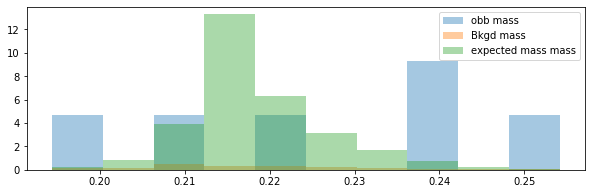

In [82]:
lowLumCut3=cut1(0.1,0.7,'KtDeltaR',lowLumCut2)
histlowLum , binsEdg=np.histogram(np.array(lowLumCut3['KtDeltaR']), bins=10, density= False)
plt.bar(binsEdg[:-1], 2050*histlowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='obb mass')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut3=cut1(0.1,0.7,'KtDeltaR',qcdDataCut2)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut3['KtDeltaR']), bins=10, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Bkgd mass')

higgsDataCut3=cut1(0.1,0.7,'KtDeltaR',higgsDataCut2)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut3['KtDeltaR']), bins=10, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass']))+(2000 *histQcd/len(qcdData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='expected mass mass')

plt.legend()



In [85]:
bkgdMean = 440 * len(qcdDataCut3)/len(qcdData)
    
signalMean = 442 * len(lowLumCut3)/len(lowLum)
    
p = (1-scipy.stats.poisson.cdf(signalMean, bkgdMean))

print('We get a simga significance of {0:1.3f}'.format(stats.norm.ppf(1-p)))
print('number of higgs signla left {0:1.1f}'.format(signalMean))
print('number of background signla left {0:1.1f}'.format(bkgdMean))

We get a simga significance of 4.921
number of higgs signla left 6.0
number of background signla left 0.4


In [79]:
lowLum.shape

(442, 14)

In [81]:
lowLumCut3.shape

(6, 14)